In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
scores = pd.read_csv('datasets/student_performance_modified.csv')
scores.head()

,Hours Studied,Score Obtained,Outliers,Training,Test
0,22,0.869736,False,0,1
1,26,0.912112,False,1,0
2,45,1.143020,False,0,1
3,46,1.156660,False,1,0
4,50,1.212843,False,0,1


In [3]:
scores.shape

(122, 5)

In [4]:
x_training = scores.loc[scores['Training']== 1]
x_training.shape

(50, 5)

In [5]:
x_training = x_training.drop(['Outliers', 'Training', 'Test'], axis= 1)
x_training.head()

,Hours Studied,Score Obtained
1,26,0.912112
3,46,1.156660
5,59,1.349299
7,73,1.592205
9,93,2.015385


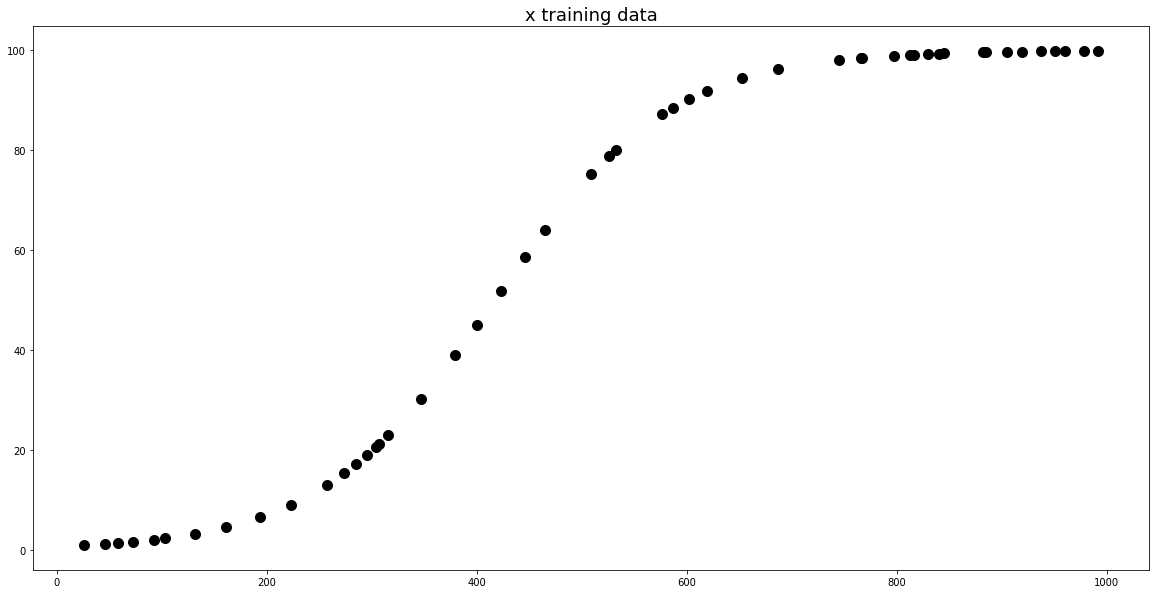

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(x_training['Hours Studied'],
            x_training['Score Obtained'],
            c= 'black',
            s= 100)
plt.title('x training data', size= 18)
plt.show()

In [7]:
x_testing = scores.loc[scores['Test']== 1]
x_testing = x_testing.drop(['Outliers', 'Training', 'Test'], axis= 1)
x_testing.head()

,Hours Studied,Score Obtained
0,22,0.869736
2,45,1.143020
4,50,1.212843
6,68,1.500874
8,83,1.791570


In [8]:
x_testing.shape

(72, 2)

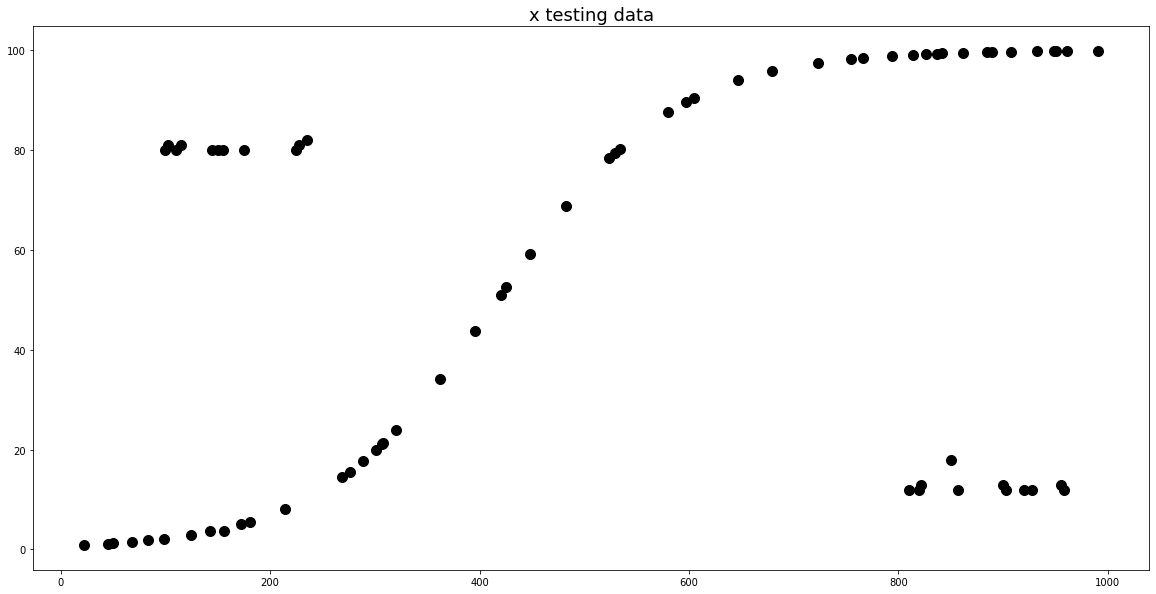

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(x_testing['Hours Studied'],
            x_testing['Score Obtained'],
            c= 'black',
            s= 100)
plt.title('x testing data', size= 18)
plt.show()

### local outlier factor

In [10]:
from sklearn.neighbors import LocalOutlierFactor

In [11]:
lof_novelty = LocalOutlierFactor(n_neighbors= 5,
                                 contamination= 'auto',
                                 novelty= True)
lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
# predict() should always be called on data the estimator hasn't seen before
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [12]:
n_outliers = (y_pred == -1).sum()
n_outliers

14

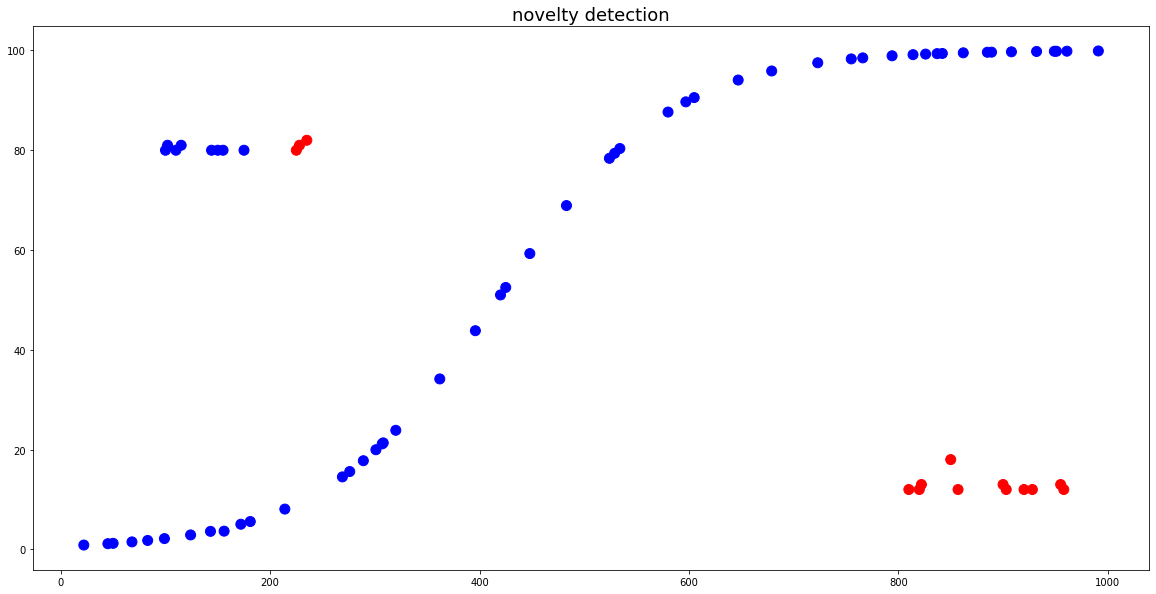

In [14]:
colors = np.array(['r', 'b'])
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(x_testing['Hours Studied'],
            x_testing['Score Obtained'],
            c= colors[(y_pred +1) // 2],
            s= 100)
plt.title('novelty detection', size= 18)
plt.show()

In [15]:
lof_novelty = LocalOutlierFactor(n_neighbors= 5,
                                 contamination= 0.01,
                                 novelty= True)
lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [16]:
n_outliers = (y_pred == -1).sum()
n_outliers

22

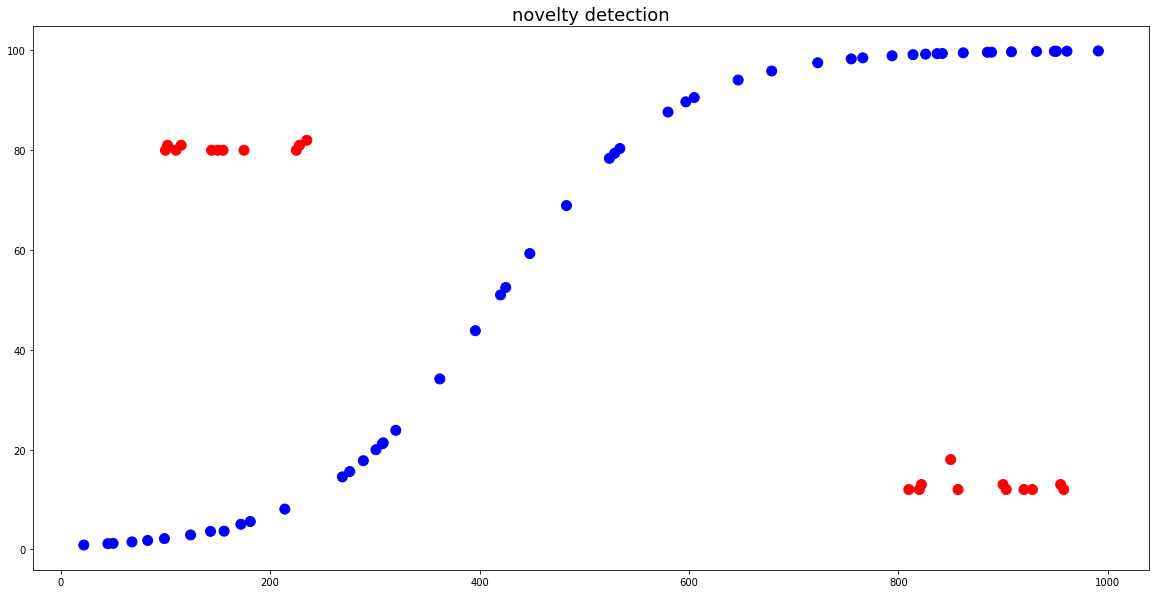

In [17]:
colors = np.array(['r', 'b'])
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(x_testing['Hours Studied'],
            x_testing['Score Obtained'],
            c= colors[(y_pred +1) // 2],
            s= 100)
plt.title('novelty detection', size= 18)
plt.show()

### using predict scores samples and decision function

In [18]:
INLIER = np.array([[500, 99]])
OUTLIER = np.array([[10000, 40000]])

In [20]:
lof_novelty.predict(INLIER), lof_novelty.predict(OUTLIER)

(array([1]), array([-1]))

In [21]:
lof_novelty.score_samples(INLIER), lof_novelty.score_samples(OUTLIER)
#larger values are inliers

(array([-1.01386409]), array([-818.57692939]))

In [22]:
lof_novelty.decision_function(INLIER), lof_novelty.decision_function(OUTLIER)
#positive scores are inliers

(array([0.39025402]), array([-817.17281128]))